## **FINAL MODEL**

## Model with 5 dropout layers with dropout rates as 0.3,0.4,0.5,0.5,0.5 respectively and using Earlystoping.

In [ ]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeUniform()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

#This line adds a flatten layer that converts the multidimensional output from the previous layer into a flat vector. This is necessary before passing the data to a fully connected layer.
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 20.8 MB/s eta 0:00:00


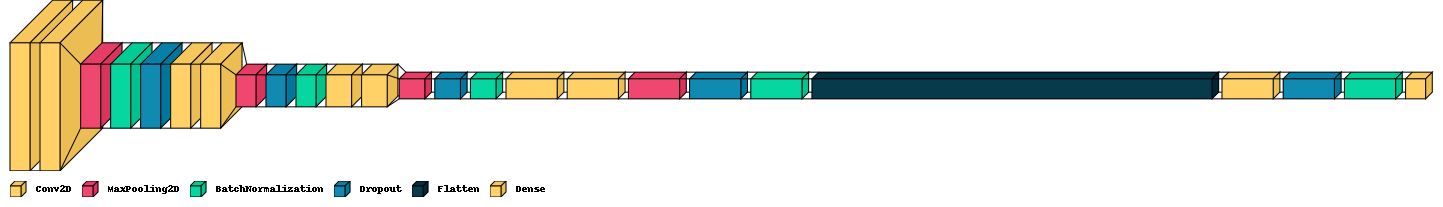

In [ ]:
#visualize the CNN Model that we created

#Install Visual Keras
!pip install visualkeras

# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=0.5,legend=True)

This model has 24 trainable layers. There are eight 2D Convolutional layers with activation function as "relu" and same padding strategies are used in this model.Four Max-polling layers of pool size of (2,2) are used to avoid spatial dimensions.The model has two batch normalization and full connected layers .The model contain five droupout layers with droupout rates  of 0.3,0.4,0.5,0.5,and 0.5.One flatten layer is also in it. 

In [ ]:
model.summary()

# Compile the model
model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs with a batch size of 25
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     7

For compling the model,optimzer is 'RMSprop',loss function is 'sparse_categorical_crossentropy'and accuracy is the metric.The  model achieve 88% accuaracy on test data and almost 88% accuracy on the validation data.  

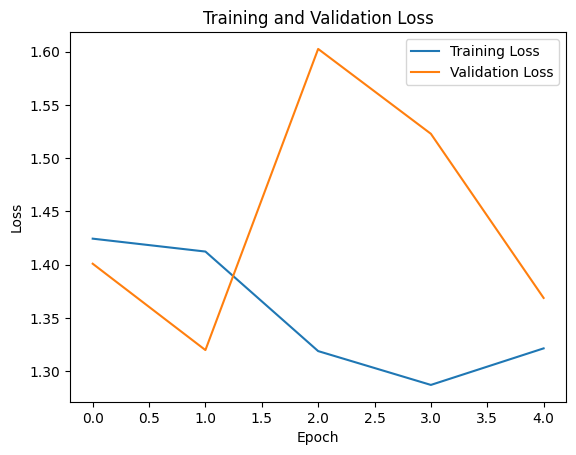

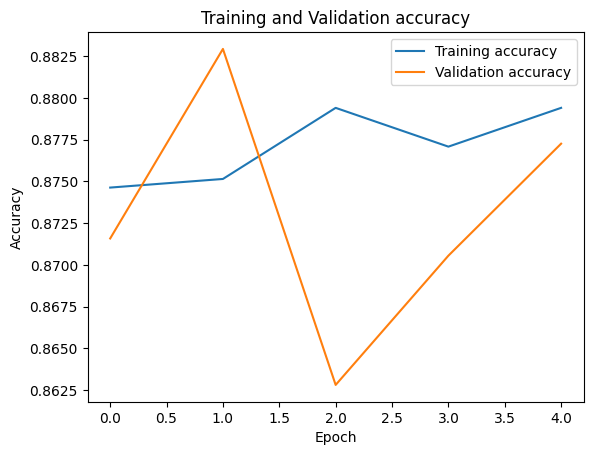

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get the classification report for the test data
print(classification_report(test_labels, test_pred_labels))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2014
           1       0.83      0.37      0.51       409

    accuracy                           0.88      2423
   macro avg       0.86      0.68      0.72      2423
weighted avg       0.88      0.88      0.86      2423



The precision,recall and f1-score of the original class are 0.88,0.99 and 0.93 respectively.For the fake class,the scores are 0.83,0.37 and 0.51 respectively.

Confusion matrix:
[[1984   30]
 [ 258  151]]


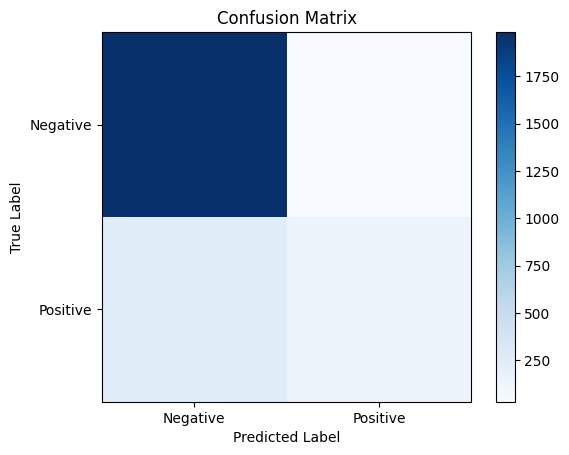

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_pred_labels)

print('Confusion matrix:')
print(cm)

# Visual representation of the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The model is predicted 1984 instances correctly as original (true negative), while 30 instances are incorrectly predicted as fake (false positive). 258 instances are incorrectly predicted as original (false negative), and 151 instances were correctly predicted as fake (true positive).

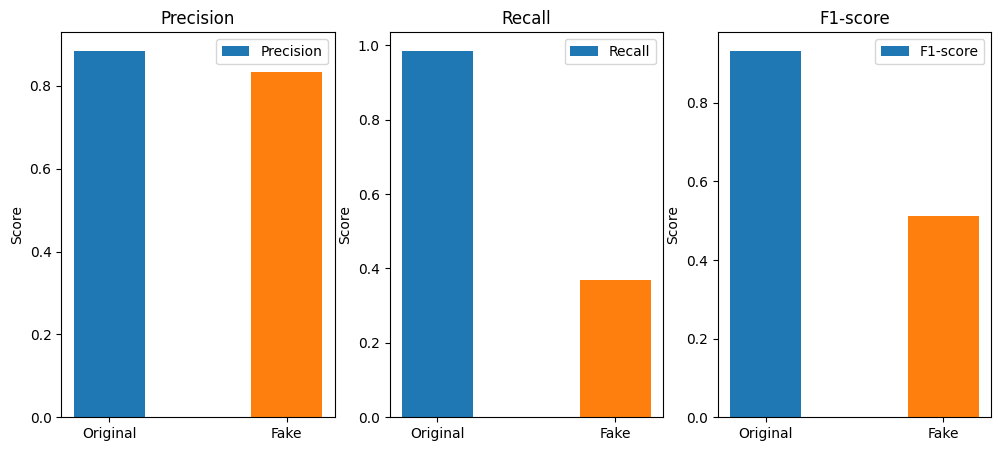

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_pred_labels)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision,recall and f1-score for the original class are more than the fake class.